<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/Pokemon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 포켓몬 데이터셋을 통한 전설의 포켓몬(Legendary) 분류 모델 생성

캐글 데이터셋 :https://www.kaggle.com/abcsds/pokemon  
참고한 깃허브 및 코드 : https://github.com/ai-rtistic/AIFFEL-Project/blob/master/Fundamental/FD10_EDA.ipynb,   
  
  
https://www.kaggle.com/ash316/learn-pandas-with-pokemons

* 파일 불러오기 절차 

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"realspbabo","key":"84850eca11ef7983c622626ae833305f"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d abcsds/pokemon

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 29.7MB/s]


In [ ]:
!ls

pokemon.zip  sample_data


In [ ]:
# zip 파일 압축 풀기
!unzip pokemon.zip

Archive:  pokemon.zip
  inflating: Pokemon.csv             


* 필요 라이브러리 임포트 및 csv 파일 임포트


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.shape

(800, 13)

: 800개의 레코드와 13개의 열이 존재한다 .

In [ ]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### 열 정보


*  #: ID for each pokemon
*  Name: Name of each pokemon
*  Type 1: Each pokemon has a type, this    determines weakness/resistance to attacks
*  Type 2: Some pokemon are dual type and have 2
*  Total: sum of all stats that come after this, a general guide to how strong a pokemon is
*  HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
*  Attack: the base modifier for normal attacks (eg. Scratch, Punch)
*  Defense: the base damage resistance against normal attacks
*  SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
*  SP Def: the base damage resistance against special attacks
*  Speed: determines which pokemon attacks first each round

: **이름과 타입열만 문자열 자료형이며,   
 속성에 있어 type1 대분류, type2 소분류 이다 . (소분류가 없는 포켓몬들이 800-414 만큼 존재한다)**

*  중복 데이터 있는지 확인 



In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('#', axis =1 , inplace= True)

In [ ]:
# 열이름 대문자니까 소문자로 바꿔버리자 
df.columns = df.columns.str.lower()
df.head()

,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,count
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,1
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1


* 타입별 포켓몬을 관측해보자 


In [ ]:
print(" 포켓몬 타입 : " , df['type 1'].unique() ,"\n") 
print("포켓몬 타입 수 :", df['type 1'].nunique())

 포켓몬 타입 :  ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] 

포켓몬 타입 수 : 18


In [ ]:
df['type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type 1, dtype: int64

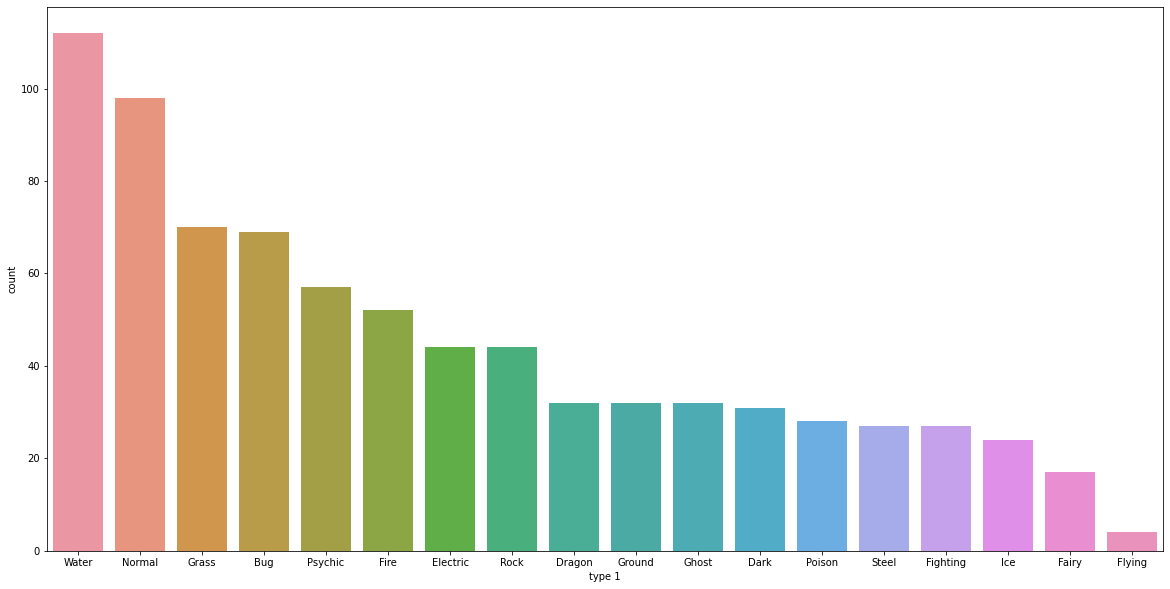

In [ ]:
plt.figure(figsize =(20,10))
sns.countplot(data = df, x = 'type 1', order = df['type 1'].value_counts().index)

: 대분류 결과  물 - 일반 - 땅 속성 순으로 타입이 많다.

In [ ]:
# 포켓몬 타입별 비율을 확인해보자 
df['type 1'].value_counts() / df['type 1'].value_counts().sum()

Water       0.14000
Normal      0.12250
Grass       0.08750
Bug         0.08625
Psychic     0.07125
Fire        0.06500
Electric    0.05500
Rock        0.05500
Dragon      0.04000
Ground      0.04000
Ghost       0.04000
Dark        0.03875
Poison      0.03500
Steel       0.03375
Fighting    0.03375
Ice         0.03000
Fairy       0.02125
Flying      0.00500
Name: type 1, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':


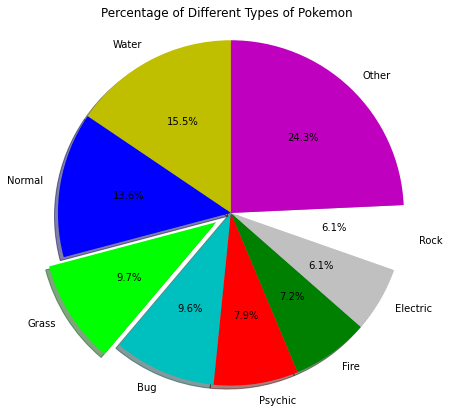

In [ ]:
# 파이차트 : 해당 변수에 속하는 데이터 값의 크기에 비례

labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]      #  각 데이터 개수 
colors = ['Y', 'B', '#00ff00', 'C', 'R', 'G', 'silver', 'white', 'M']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0)  # only "explode" 1,2,3

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal') # 비율 원에 가깝게 
plt.title("Percentage of Different Types of Pokemon")
plt.plot()

fig=plt.gcf()
fig.set_size_inches(7,7)


In [ ]:
# 소분류 까지 알아보자 
grouped = df.groupby(['type 1', 'type 2'])

grouped.size()

type 1  type 2  
Bug     Electric     2
        Fighting     2
        Fire         2
        Flying      14
        Ghost        1
                    ..
Water   Ice          3
        Poison       3
        Psychic      5
        Rock         4
        Steel        1
Length: 136, dtype: int64

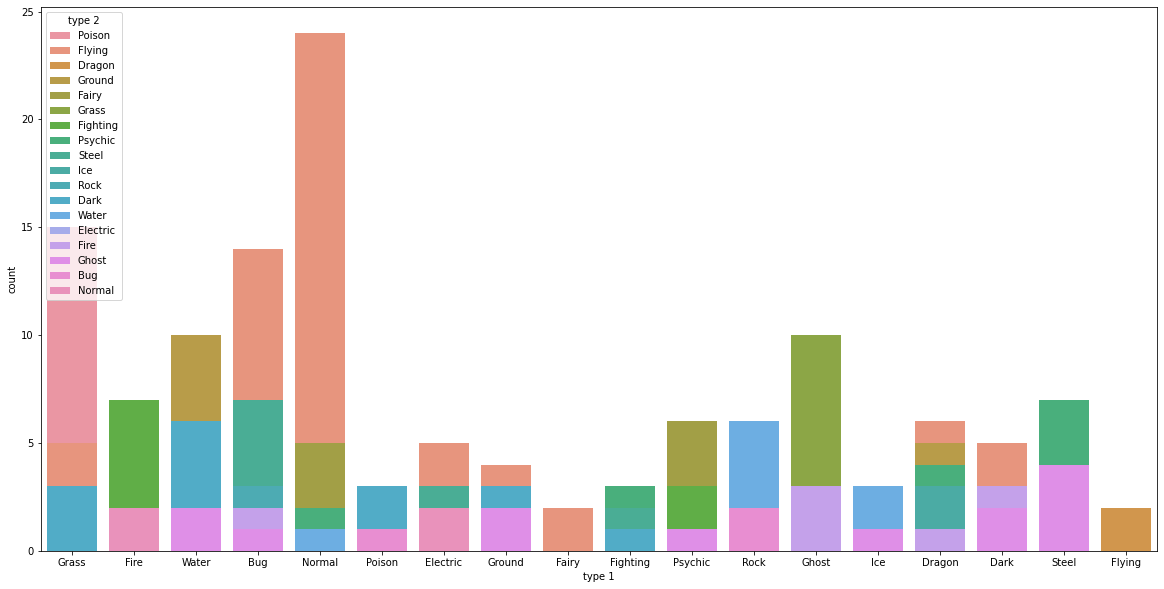

In [ ]:
# 시각화 해보고 싶다. 
fig = plt.figure(figsize =(20,10))
ax = fig.add_subplot(1,1,1)

sns.countplot(data = df, x= 'type 1', hue = 'type 2', dodge = False ,ax = ax)

In [ ]:
# 가장 강한 포켓몬
strong = df.sort_values(by = 'total', ascending =False)

strong.set_index('name', inplace = True)                  # 포켓몬 이름을 인덱스로 지정
strong.head(10)

,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,count
name,,,,,,,,,,,,
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,1
MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,1
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,1
KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,1
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,1
Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True,1
KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True,1
KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True,1
SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,1


: 능력치 총합 상위 10마리의 포켓몬 중 상위 8마리가 전설의 포켓몬이다 ! 

## 전설의 포켓몬 확인



In [ ]:
legend  =  df.loc[ df['legendary'] , :]
ordinary = df.loc[df['legendary'] == False , :]

In [ ]:
legend.set_index('name', inplace =True)
legend.sort_values(by ='total', ascending =False)

,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,count
name,,,,,,,,,,,,
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,1
MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,1
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,1
KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,1
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,1
Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True,1
ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True,1


전설의 포켓몬은 총 65마리 

In [ ]:
ordinary.set_index('name', inplace =True)
ordinary.sort_values(by ='total', ascending =False)

,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary,count
name,,,,,,,,,,,,
MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,1
GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,1
SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,1
TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False,1
Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,1
Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False,1
Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False,1


일반 포켓몬은 총 735마리 

* 전설의 포켓몬 타입분포:  
전설의 포켓몬은 psyschic 속성이 가장 많음


In [ ]:
legend['type 1'].value_counts()

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: type 1, dtype: int64

* 일반 포켓몬 타입분포 :

In [ ]:
ordinary['type 1'].value_counts()

Water       108
Normal       96
Bug          69
Grass        67
Fire         47
Psychic      43
Electric     40
Rock         40
Ghost        30
Dark         29
Poison       28
Ground       28
Fighting     27
Steel        23
Ice          22
Dragon       20
Fairy        16
Flying        2
Name: type 1, dtype: int64

* 산점도로 능력치 분포도를 알아보자 

In [ ]:
df['total'].describe()


count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: total, dtype: float64

: 전체 포켓몬 능력치 평균 435   
최약체 180 / 최강 780

그룹별 능력치 

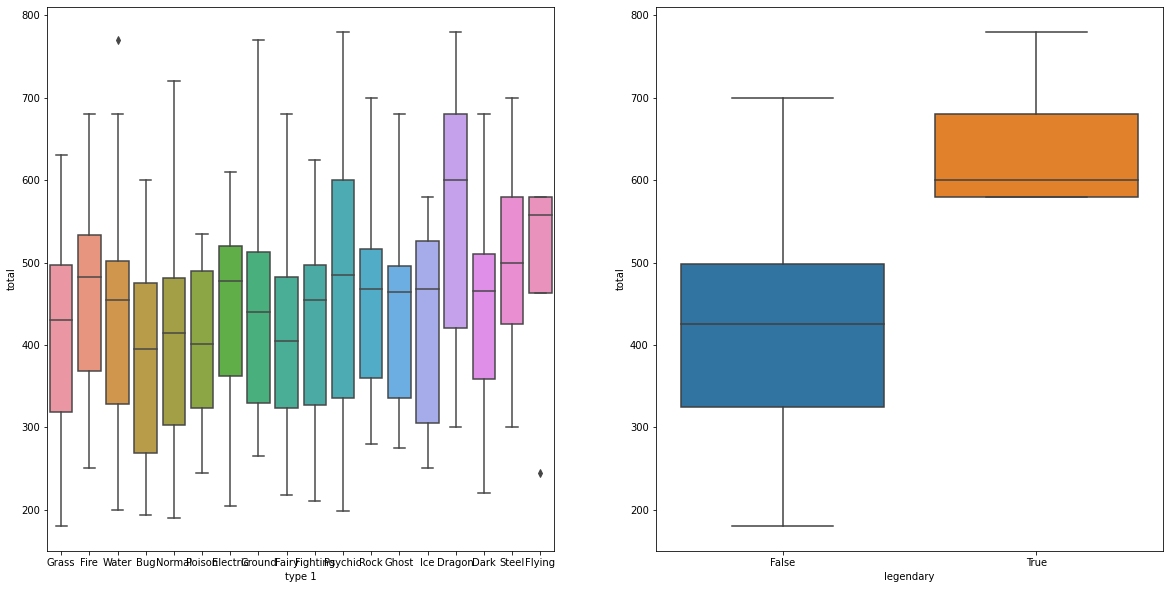

In [ ]:
fig =plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(data = df, x = 'type 1', y = 'total', ax = ax1)
sns.boxplot(data = df, x = 'legendary', y = 'total', ax = ax2)


산점도 (두 연속변수 간에 관계)

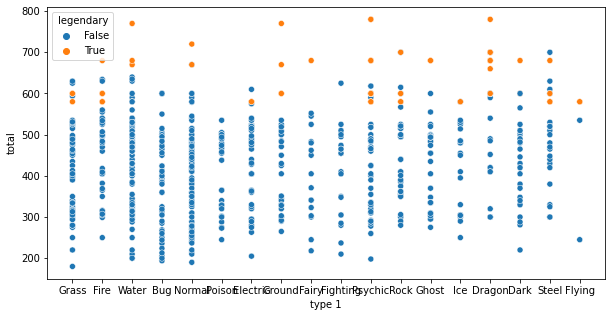

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))

sns.scatterplot(data = df, x = 'type 1', y ='total', hue = 'legendary', ax = ax)

* 세대별(범주) 포켓몬 타입분포는 어떨까   
* 세대별 전설 포켓몬 수는 어떨까
  
불린 인덱싱으로  구별한 후에 countplot 사용하자 




어떻게 그래프로 표현해야 할지 생각이 안날때 , 
1. 표현하려고 하는 것이 각 범주별로 데이터의 개수 (빈도수)? 
  : countplot, hist, boxplot . .
2.columns의 자료형을 확인해보자.  
(연속형? / 범주형)  
연속형 자료형은 산점도 가능
(범주형 - 각 데이터 값의 크기 (비율) : 파이형
범주형 데이터의 분포 : 박스플롯 
)


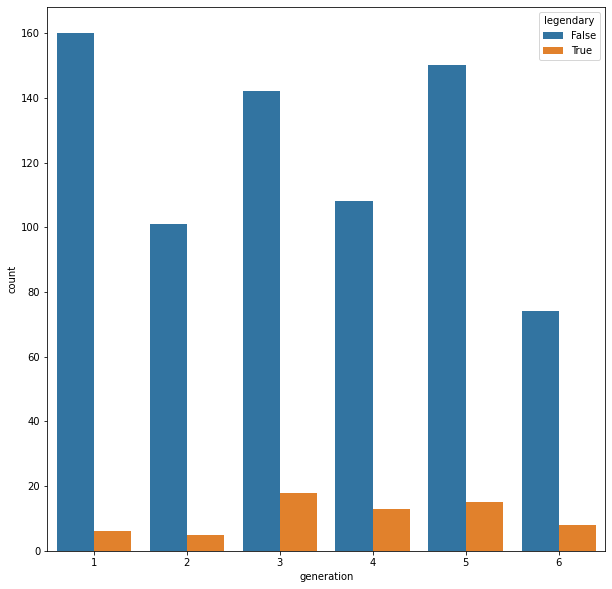

In [ ]:
fig , ax = plt.subplots(figsize = (10,10))

sns.countplot(data = df, x= 'generation', hue = 'legendary',  ax = ax)

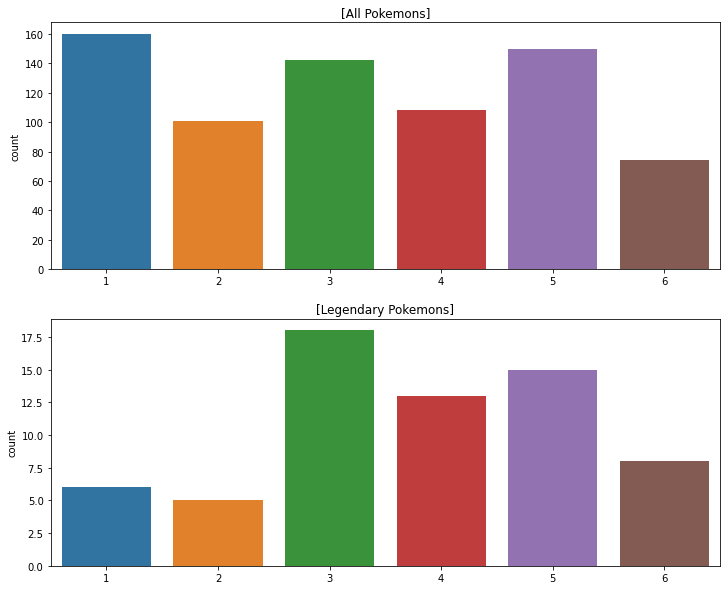

In [ ]:
plt.figure(figsize=(10, 10))   

plt.subplot(211)
sns.countplot(data=ordinary, x="generation").set_xlabel('')
plt.title("[All Pokemons]")
plt.subplot(212)
sns.countplot(data=legend, x="generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

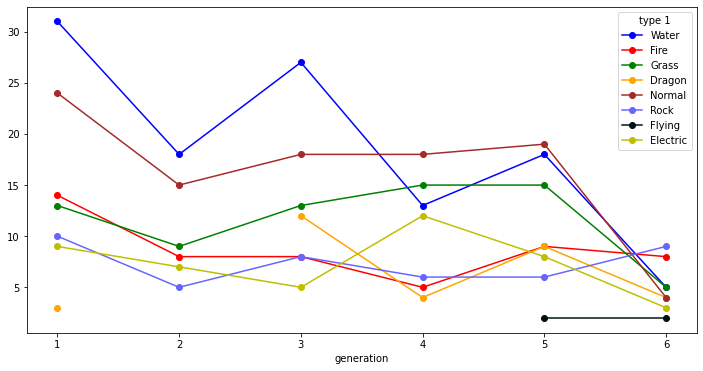

In [ ]:
a=df.groupby(['generation','type 1']).count().reset_index()
a=a[['generation','type 1','total']]
a=a.pivot('generation','type 1','total')

a[['Water','Fire','Grass','Dragon','Normal','Rock','Flying','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
